# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [109]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [110]:
sinasc_raw.groupby(by='munResNome')[('IDADEMAE','IDADEPAI')].mean()

<ipython-input-110-cc206c7890cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(by='munResNome')[('IDADEMAE','IDADEPAI')].mean()


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

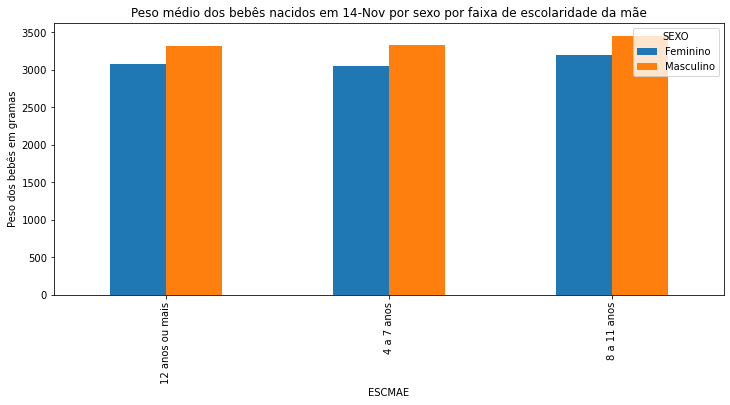

In [111]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
aniversario = sinasc_raw['DTNASC'] =='2019-11-14'
sinasc_raw[aniversario].groupby(by=['ESCMAE','SEXO'])['PESO'].mean().unstack().dropna().plot.bar(figsize=(12,5))
plt.title('Peso médio dos bebês nacidos em 14-Nov por sexo por faixa de escolaridade da mãe')
plt.ylabel('Peso dos bebês em gramas')
plt.show()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [112]:
agrupamento = sinasc_raw.groupby('munResNome')[('IDADEMAE','IDADEPAI')]
base = agrupamento.aggregate([min,'max',np.mean])                                          
base

<ipython-input-112-cf38e07c5da1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupamento = sinasc_raw.groupby('munResNome')[('IDADEMAE','IDADEPAI')]


IDADEMAE                IDADEPAI                 
                               min max       mean      min   max       mean
munResNome                                                                 
Alta Floresta D'Oeste           14  53  25.991826     17.0  58.0  29.548701
Alto Alegre dos Parecis         14  41  24.844156     16.0  50.0  29.179104
Alto Paraíso                    11  42  24.960177     21.0  49.0  28.833333
Alvorada D'Oeste                15  44  25.770732     17.0  52.0  30.757282
Ariquemes                       13  44  25.607866     20.0  51.0  32.466667
Buritis                         14  44  25.559177     18.0  49.0  30.812500
Cabixi                          13  39  26.037500     19.0  47.0  34.333333
Cacaulândia                     16  42  25.546667     28.0  50.0  36.333333
Cacoal                          14  47  26.890102     17.0  66.0  30.931854
Campo Novo de Rondônia          13  40  24.825301     21.0  40.0  30.500000
Candeias do Jamari              14  45  25.243323     21.0  41.0  29.894737
Castanheiras                    17  39  27.281250     17.0  43.0  30.392857
Cerejeiras                      15  53  27.240506     19.0  52.0  31.652778
Chupinguaia                     13  42  25.333333     20.0  46.0  29.629630
Colorado do Oeste               15  47  27.602804     23.0  53.0  34.354839
Corumbiara                      15  43  24.716535     21.0  52.0  32.470588
Costa Marques                   12  41  24.412017     17.0  60.0  30.613636
Cujubim                         14  42  24.482927     19.0  44.0  31.400000
Espigão D'Oeste                 14  44  26.093333     16.0  86.0  31.198113
Governador Jorge Teixeira       13  41  24.401786     22.0  37.0  29.222222
Guajará-Mirim                   13  43  25.462228     19.0  44.0  30.470588
Itapuã do Oeste                 15  46  26.064220     25.0  73.0  42.500000
Jaru                            12  45  25.982974     19.0  62.0  32.197183
Ji-Paraná                       12  44  26.361137     15.0  63.0  31.132239
Machadinho D'Oeste              13  44  25.480000     17.0  53.0  31.326923
Ministro Andreazza              17  44  27.904762     21.0  55.0  33.849315
Mirante da Serra                14  46  26.304878     20.0  56.0  32.154762
Monte Negro                     14  40  25.648241     20.0  55.0  34.678571
Município ignorado - RO         24  24  24.000000     22.0  22.0  22.000000
Nova Brasilândia D'Oeste        15  51  26.222222     20.0  48.0  30.520833
Nova Mamoré                     14  46  25.326389     19.0  43.0  31.692308
Nova União                      16  39  26.894231     18.0  53.0  31.371429
Novo Horizonte do Oeste         15  41  26.938776     20.0  56.0  31.588235
Ouro Preto do Oeste             14  44  26.375594     17.0  60.0  31.233244
Parecis                         16  41  26.454545     18.0  61.0  32.473684
Pimenta Bueno                   13  47  25.199675     16.0  70.0  29.745174
Pimenteiras do Oeste            14  40  25.075000     25.0  45.0  35.600000
Porto Velho                     12  47  26.312670     16.0  65.0  32.352679
Presidente Médici               14  44  25.796053     16.0  64.0  30.150754
Primavera de Rondônia           16  39  27.023256     21.0  44.0  31.888889
Rio Crespo                      16  39  26.660000     28.0  28.0  28.000000
Rolim de Moura                  14  44  26.600863     16.0  69.0  30.360479
Santa Luzia D'Oeste             15  41  26.121212     18.0  53.0  30.703297
Seringueiras                    14  42  24.910714     20.0  47.0  30.500000
São Felipe D'Oeste              17  41  26.481481     18.0  57.0  31.395833
São Francisco do Guaporé        14  41  25.660066     19.0  54.0  31.638889
São Miguel do Guaporé           14  42  25.926346     19.0  60.0  32.666667
Teixeirópolis                   16  39  26.031250     20.0  67.0  31.500000
Theobroma                       15  42  25.536082     23.0  45.0  30.083333
Urupá                           15  43  26.688235     17.0  48.0  31.00892

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [113]:
sinasc_raw.groupby('munResNome')['QTDFILVIVO'].aggregate([min, max, np.mean]).sort_values(by=['max'], ascending=False)[:1]

,min,max,mean
munResNome,,,
Santa Luzia D'Oeste,0.0,30.0,1.171717


In [114]:
filtro_municipio = base.index=="Santa Luzia D'"+"Oeste"
base[filtro_municipio]

IDADEMAE                IDADEPAI                 
                         min max       mean      min   max       mean
munResNome                                                           
Santa Luzia D'Oeste       15  41  26.121212     18.0  53.0  30.703297

O insight é que a quantidade de filhos está correlacionada negativamente com a idade dos pais